In [114]:
import os, sys
import ants
import argparse
import shutil
import logging
import subprocess

In [108]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/')

['dicom',
 '1_z_score_',
 'orig',
 '1_z_score',
 'folders_description.md',
 'meta.csv']

In [235]:
def calculate_z_score(img):
    """ Calculates Z-score normalisation over ants.img and returns new image"""
    
    if type(img) is str:
        # Read images if input is pathlike
        img = ants.image_read(img)
        
    img_z = (img.numpy() - img.numpy().mean())/img.numpy().std()
    new_img = img.new_image_like(img_z)
    return new_img

def rigid_reg(fixed, moving):
    """Rigidly register `moving` image onto `fixed` image and apply resulting transformation on `mask`.
    Returns mask in `fixed` resolution."""
    
    if type(fixed) is str:
        # Read images if input is pathlike
        fixed = ants.image_read(fixed)
        moving = ants.image_read(moving)
    
    # Compute registration if input is ants.image
    res = ants.registration(fixed=fixed, moving=moving,
                            type_of_transform='Rigid')
    
    new_img = ants.apply_transforms(fixed, moving,
                                    transformlist = res['fwdtransforms'][0])
    return new_img

def hdbet_fast(src_path, dst_path):
    command = ["hd-bet", "-i", src_path, "-o", dst_path, "-device", "cpu", "-mode", "fast", "-tta", "0"]
    subprocess.call(command)
    return

def hdbet(src_path, dst_path):
    command = ["hd-bet", "-i", src_path, "-o", dst_path, "-device", "cpu"]
    subprocess.call(command)
    return

In [293]:
from glob import glob
import ants 

output = '/anvar/public_datasets/preproc_study/gbm/1_z_score/'
path = '/anvar/public_datasets/preproc_study/gbm/orig/'
movingfilenames = ['T1.nii.gz', 'FLAIR.nii.gz', 'T2.nii.gz']
fixedfilename = 'CT1.nii.gz'

subjects_paths = [f.path for f in os.scandir(path) if f.is_dir()]
subjects = [f.split('/')[-1] for f in subjects_paths ]

for subject in ['TCGA-06-0646']:
    # Creating folder to save subject data
#     os.makedirs(output + subject + '/', exist_ok=True)
    try:
#         os.makedirs(output + subject + '/')
        img_fixed = glob(path + subject + '/' + fixedfilename)[0]

        for name in movingfilenames:
            img_moving = glob(path + subject + '/' + name)[0]
            # Image registration
            registered_img = rigid_reg(img_fixed, img_moving)
            # Z-score individual calculation
            registered_img_z = calculate_z_score(registered_img)
            ants.image_write(registered_img_z, output + subject + '/' + name , ri=False);

        img_fixed_z = calculate_z_score(img_fixed)
        ants.image_write(img_fixed_z, output + subject + '/' + fixedfilename , ri=False);
    except:
        pass

Exception Object caught: 

itk::ExceptionObject (0x55f1c2940690)
Location: "unknown" 
File: /build100/ANTsPy/itksource/Modules/Core/Common/include/itkImageBase.hxx
Line: 308
Description: itk::ERROR: itk::ERROR: Image(0x55f17f977320): itk::ImageBase::CopyInformation() cannot cast PKN3itk10DataObjectE to PKN3itk9ImageBaseILj4EEE




In [295]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0646/CT1a.nii.gz')

['T2.nii.gz',
 'FLAIR.nii.gz',
 'T1.nii.gz',
 'CT1_SEG.nii.gz',
 'CT1a.nii.gz',
 'CT1.nii.gz']

In [298]:
ants.image_read('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0355/CT1a.nii.gz')

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (512, 512, 72, 2)
	 Spacing    : (0.4688, 0.4688, 2.5, 3.0542)
	 Origin     : (-119.192, 95.7908, -58.339, 0.0)
	 Direction  : [ 1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]

In [ ]:
ants.image_read('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0646/CT1a.nii.gz')

In [284]:
fixed = ants.image_read(img_fixed)
moving = ants.image_read(img_moving)
# Compute registration if input is ants.image
res = ants.registration(fixed=fixed, moving=moving,
                            type_of_transform='Rigid')
    
# new_img = ants.apply_transforms(img_fixed, img_moving,
#                                     transformlist = res['fwdtransforms'][0])

Exception Object caught: 

itk::ExceptionObject (0x55f1ac4a0fc0)
Location: "unknown" 
File: /build100/ANTsPy/itksource/Modules/Core/Common/include/itkImageBase.hxx
Line: 308
Description: itk::ERROR: itk::ERROR: Image(0x55f1ac49f640): itk::ImageBase::CopyInformation() cannot cast PKN3itk10DataObjectE to PKN3itk9ImageBaseILj4EEE




In [291]:
ants.plot(ants.image_read('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0646/CT1_SEG.nii.gz'))

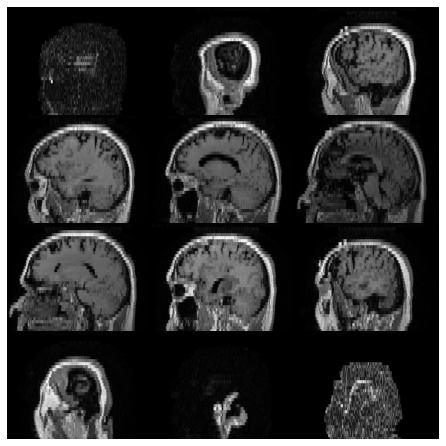

In [286]:
ants.plot(img_moving)

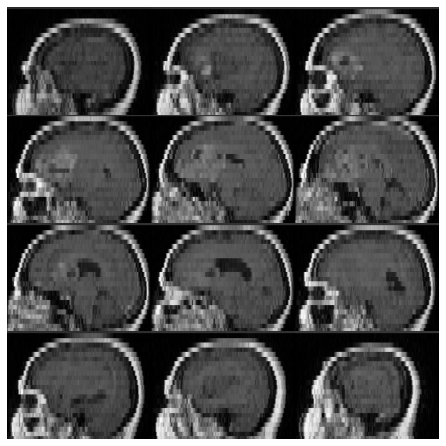

In [57]:
ants.plot(image_t1c_z)

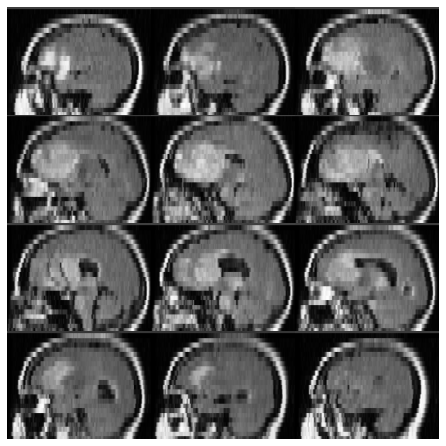

In [55]:
ants.plot(image_flair_z)

## Copy `seg` files:

In [109]:
basedir = '/anvar/public_datasets/preproc_study/gbm/orig/'

In [113]:
 os.listdir('/anvar/public_datasets/preproc_study/gbm/1_z_score/TCGA-02-0086')

['T2.nii.gz', 'FLAIR.nii.gz', 'T1.nii.gz', 'CT1_SEG.nii.gz', 'CT1.nii.gz']

In [248]:
import shutil
# no acess to read-only folder
for i in os.listdir('/anvar/public_datasets/preproc_study/gbm/orig/'):
#     print(len(os.listdir('/anvar/public_datasets/preproc_study/gbm/1_z_score/' + i )))
#     shutil.copy(basedir + i + '/CT1_SEG.nii.gz', '/anvar/public_datasets/preproc_study/gbm/1_z_score/' + i + '/CT1_SEG.nii.gz',)

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
1
5
5
5
5


In [299]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/')

['dicom',
 'orig',
 '2_n4',
 '1_z_score',
 'folders_description.md',
 'meta.csv',
 '1_reg']

In [362]:
import shlex, time 
base_command = """sudo cp /anvar/public_datasets/preproc_study/gbm/orig/{subject}/CT1_SEG.nii.gz /anvar/public_datasets/preproc_study/gbm/3_susan_captk/{subject}/CT1_SEG.nii.gz"""
for patient in os.listdir('/anvar/public_datasets/preproc_study/gbm/orig/'):
    print(patient)
    command_to_run = base_command.format(subject = patient)
    command_to_run = shlex.split(command_to_run)
    process = subprocess.Popen(command_to_run,shell=False)
#     time.sleep(1)

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 479291 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468070 is still running



TCGA-02-0086
TCGA-02-0102
TCGA-02-0059


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468072 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468074 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468076 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-2624/CT1_SEG.nii.gz': No such file or directory


TCGA-02-0069
TCGA-19-2624
TCGA-06-0182


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468078 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468080 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0360/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468082 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468084 is still running



TCGA-08-0360
TCGA-02-0006
TCGA-19-2631
TCGA-12-1094


cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-2631/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468086 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-1094/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468088 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-2570/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468090 is still running



TCGA-06-2570
TCGA-06-0119
TCGA-06-0145


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468092 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468094 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0509/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468096 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-5408/CT1_SEG.nii.gz': No such file or directory


TCGA-08-0509
TCGA-06-5408
TCGA-02-0116


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468098 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468100 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-0188/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468102 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6661/CT1_SEG.nii.gz': No such file or directory


TCGA-06-0188
TCGA-76-6661
TCGA-02-0047


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468104 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468106 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-3650/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468108 is still running



TCGA-12-3650
TCGA-02-0064
TCGA-14-1825


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468110 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-14-1825/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468112 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468114 is still running



TCGA-06-0162
TCGA-02-0033
TCGA-08-0359


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468116 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0359/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468118 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468120 is still running



TCGA-02-0054
TCGA-06-0184
TCGA-12-1601
TCGA-06-5413


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468122 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-1601/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468124 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-5413/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468126 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6191/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468128 is still running



TCGA-76-6191
TCGA-02-0075
TCGA-06-0177


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468130 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468132 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468134 is still running



TCGA-06-0154
TCGA-06-0179
TCGA-19-5951


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468136 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-5951/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468138 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-1598/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468140 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-0616/CT1_SEG.nii.gz': No such file or directory


TCGA-12-1598
TCGA-12-0616
TCGA-02-0070


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468142 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468144 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-1084/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468146 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-0829/CT1_SEG.nii.gz': No such file or directory


TCGA-06-1084
TCGA-12-0829
TCGA-76-4932


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468148 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-4932/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468150 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468152 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6282/CT1_SEG.nii.gz': No such file or directory


TCGA-02-0068
TCGA-76-6282
TCGA-08-0385
TCGA-12-1098


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468154 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0385/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468156 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-1098/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468158 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0512/CT1_SEG.nii.gz': No such file or directory


TCGA-08-0512
TCGA-08-0389
TCGA-14-1794


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468160 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0389/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468162 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-14-1794/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468164 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-1789/CT1_SEG.nii.gz': No such file or directory


TCGA-19-1789
TCGA-02-0009
TCGA-06-0122


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468166 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468168 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468170 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0355/CT1_SEG.nii.gz': No such file or directory


TCGA-08-0355
TCGA-06-6389
TCGA-06-0190
TCGA-06-0192


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468172 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-6389/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468174 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-0190/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468176 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-0192/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468178 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468180 is still running



TCGA-02-0027
TCGA-06-0137
TCGA-12-0776


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468182 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-0776/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468184 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6657/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468186 is still running



TCGA-76-6657
TCGA-06-0176
TCGA-08-0356


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468188 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0356/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468190 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6662/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468192 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0522/CT1_SEG.nii.gz': No such file or directory


TCGA-76-6662
TCGA-08-0522
TCGA-06-1802


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468194 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-1802/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468196 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-5960/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468198 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0390/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468200 is still running



TCGA-19-5960
TCGA-08-0390
TCGA-14-1456
TCGA-06-0158


cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-14-1456/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468202 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468204 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468220 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-0238/CT1_SEG.nii.gz': No such file or directory


TCGA-06-0139
TCGA-06-0238
TCGA-76-4935


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468222 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-4935/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468224 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-14-3477/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468226 is still running



TCGA-14-3477
TCGA-02-0106
TCGA-06-0644


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468228 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-0644/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468230 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-0963/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468232 is still running



TCGA-19-0963
TCGA-06-0187
TCGA-76-6664


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468234 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6664/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468236 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6663/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468238 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6285/CT1_SEG.nii.gz': No such file or directory


TCGA-76-6663
TCGA-76-6285
TCGA-76-4934


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468240 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-4934/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468242 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468244 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0392/CT1_SEG.nii.gz': No such file or directory


TCGA-02-0087
TCGA-08-0392
TCGA-02-0085


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468246 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468248 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468250 is still running



TCGA-06-0185
TCGA-06-0130
TCGA-06-0240


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468252 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-0240/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468254 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468256 is still running



TCGA-02-0034
TCGA-06-0149
TCGA-02-0011


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468258 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468260 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468262 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6280/CT1_SEG.nii.gz': No such file or directory


TCGA-06-0138
TCGA-76-6280
TCGA-19-5954


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468264 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-5954/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468266 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6193/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468268 is still running



TCGA-76-6193
TCGA-06-0164
TCGA-06-5417


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468270 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-5417/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468273 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-5958/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468365 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6656/CT1_SEG.nii.gz': No such file or directory


TCGA-19-5958
TCGA-76-6656
TCGA-06-0646


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468632 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-0646/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1468906 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1469198 is still running



TCGA-02-0046
TCGA-06-0142
TCGA-02-0037
TCGA-08-0520


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1469508 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1469784 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0520/CT1_SEG.nii.gz'

## Read files

In [332]:
output = '/anvar/public_datasets/preproc_study/gbm/3_susan/'
len(os.listdir(output))

106

In [230]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/1_z_score/TCGA-02-0086')

['T2.nii.gz', 'FLAIR.nii.gz', 'T1.nii.gz', 'CT1_SEG.nii.gz', 'CT1.nii.gz']

In [227]:
ants.image_read('/anvar/public_datasets/preproc_study/gbm/1_z_score/' + 'TCGA-12-1094/CT1.nii.gz')

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 22)
	 Spacing    : (0.9375, 0.9375, 6.5)
	 Origin     : (-120.0, 134.2624, -59.2019)
	 Direction  : [ 1.e+00  0.e+00  0.e+00  0.e+00 -1.e+00 -8.e-04  0.e+00 -8.e-04  1.e+00]

In [206]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-1802')

['T2.nii.gz', 'FLAIR.nii.gz', 'T1.nii.gz', 'CT1_SEG.nii.gz', 'CT1.nii.gz']

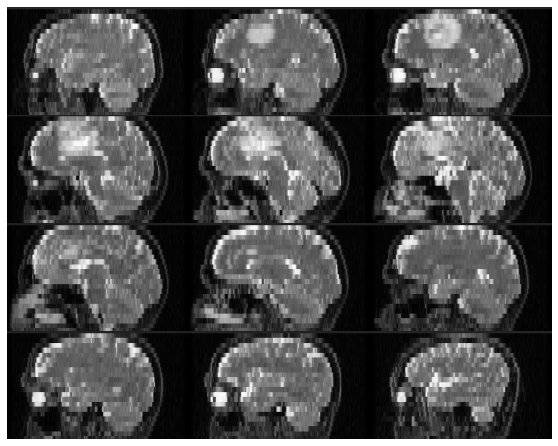

In [222]:
ants.plot('/anvar/public_datasets/preproc_study/gbm/1_z_score/' + 'TCGA-12-1094/T2.nii.gz')

In [311]:
# os.mkdir('/home/kate/projects/qc_preprocessing/2_n4_gbm/')

In [359]:
def plot_qc(image, mask, patient_id):
    fig, axs = plt.subplots(3,3,figsize=(12,12))
    idx = np.argsort(mask.sum(axis=(0,1)))[-3:]
    for i in range(3):
        axs[i, 0].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 1].imshow(mask[..., idx[i]], cmap='gray')
        axs[i, 2].imshow(image[..., idx[i]]+200*mask[..., idx[i]], cmap='gray')
    axs[0,0].set_title(patient_id)
    plt.tight_layout()
    plt.savefig(f'/home/kate/projects/qc_preprocessing/3_susan_captk_gbm/{patient_id}.png', dpi=300)
    plt.plot()
    plt.close(fig)

In [355]:
os.listdir('/home/kate/projects/qc_preprocessing/3_susan_gbm/')

['TCGA-08-0389.png',
 'TCGA-02-0054.png',
 'TCGA-06-0644.png',
 'TCGA-76-6280.png',
 'TCGA-02-0068.png',
 'TCGA-08-0522.png',
 'TCGA-06-0137.png',
 'TCGA-06-0184.png',
 'TCGA-06-6389.png',
 'TCGA-06-0192.png',
 'TCGA-02-0106.png',
 'TCGA-76-6191.png',
 'TCGA-02-0046.png',
 'TCGA-06-0187.png',
 'TCGA-06-0119.png',
 'TCGA-08-0355.png',
 'TCGA-76-6661.png',
 'TCGA-08-0520.png',
 'TCGA-06-0158.png',
 'TCGA-19-2631.png',
 'TCGA-02-0006.png',
 'TCGA-06-0177.png',
 'TCGA-06-2570.png',
 'TCGA-02-0116.png',
 'TCGA-06-0122.png',
 'TCGA-76-6656.png',
 'TCGA-06-0138.png',
 'TCGA-76-6663.png',
 'TCGA-12-1094.png',
 'TCGA-02-0034.png',
 'TCGA-06-1084.png',
 'TCGA-08-0509.png',
 'TCGA-06-0176.png',
 'TCGA-76-6193.png',
 'TCGA-08-0392.png',
 'TCGA-06-5413.png',
 'TCGA-76-6664.png',
 'TCGA-02-0085.png',
 'TCGA-08-0390.png',
 'TCGA-76-6662.png',
 'TCGA-06-0145.png',
 'TCGA-02-0070.png',
 'TCGA-14-3477.png',
 'TCGA-12-0616.png',
 'TCGA-06-0149.png',
 'TCGA-02-0069.png',
 'TCGA-06-0179.png',
 'TCGA-76-628

In [350]:
# os.mkdir('/anvar/public_datasets/preproc_study/gbm/3_susan_captk/')

In [356]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-02-0006')

['T2.nii.gz',
 'FLAIR.nii.gz',
 'T1.nii.gz',
 'CT1_n4.nii.gz',
 'CT1.nii.gz',
 'T2_n4.nii.gz',
 'T1_n4.nii.gz',
 'FLAIR_n4.nii.gz']

In [349]:
# os.mkdir('/home/kate/projects/qc_preprocessing/3_susan_captk_gbm/')

In [343]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/3_susan/TCGA-02-0046')

['T2.nii.gz', 'FLAIR.nii.gz', 'T1.nii.gz', 'CT1_SEG.nii.gz']

In [365]:
import shlex, time 
base_command = """sudo cp /anvar/public_datasets/preproc_study/gbm/orig/{subject}/CT1_SEG.nii.gz /anvar/public_datasets/preproc_study/gbm/3_susan_captk/{subject}/CT1_SEG.nii.gz"""
for patient in os.listdir('/anvar/public_datasets/preproc_study/gbm/orig/'):
    print(patient)
    command_to_run = base_command.format(subject = patient)
    command_to_run = shlex.split(command_to_run)
    process = subprocess.Popen(command_to_run,shell=False)
#     time.sleep(1)

TCGA-02-0086
TCGA-02-0102
TCGA-02-0059
TCGA-02-0069


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1475768 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613589 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613591 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613593 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613595 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-2624/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613609 is still running



TCGA-19-2624
TCGA-06-0182
TCGA-08-0360


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613611 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0360/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613613 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613615 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-2631/CT1_SEG.nii.gz': No such file or directory


TCGA-02-0006
TCGA-19-2631
TCGA-12-1094
TCGA-06-2570


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613617 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-1094/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613619 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-2570/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613621 is still running



TCGA-06-0119
TCGA-06-0145
TCGA-08-0509


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613623 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613625 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0509/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613627 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-5408/CT1_SEG.nii.gz': No such file or directory


TCGA-06-5408
TCGA-02-0116
TCGA-06-0188


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613629 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613631 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613633 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6661/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613635 is still running



TCGA-76-6661
TCGA-02-0047
TCGA-12-3650
TCGA-02-0064


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613637 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-3650/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613639 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613641 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-14-1825/CT1_SEG.nii.gz': No such file or directory


TCGA-14-1825
TCGA-06-0162
TCGA-02-0033


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613643 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613645 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613647 is still running



TCGA-08-0359
TCGA-02-0054
TCGA-06-0184


cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0359/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613649 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613651 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613653 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-1601/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613655 is still running



TCGA-12-1601
TCGA-06-5413
TCGA-76-6191
TCGA-02-0075


cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-5413/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613657 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6191/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613659 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613677 is still running



TCGA-06-0177
TCGA-06-0154
TCGA-06-0179


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613679 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613681 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613683 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-5951/CT1_SEG.nii.gz': No such file or directory


TCGA-19-5951
TCGA-12-1598
TCGA-12-0616


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613685 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-1598/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613687 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-0616/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613689 is still running



TCGA-02-0070
TCGA-06-1084
TCGA-12-0829


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613691 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-1084/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613693 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-0829/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613695 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-4932/CT1_SEG.nii.gz': No such file or directory


TCGA-76-4932
TCGA-02-0068
TCGA-76-6282


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613697 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613699 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6282/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613701 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0385/CT1_SEG.nii.gz': No such file or directory


TCGA-08-0385
TCGA-12-1098
TCGA-08-0512


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613703 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-1098/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613705 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0512/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613707 is still running



TCGA-08-0389
TCGA-14-1794
TCGA-19-1789


cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0389/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613709 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-14-1794/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613711 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-1789/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613713 is still running



TCGA-02-0009
TCGA-06-0122
TCGA-08-0355


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613716 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613718 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0355/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613720 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-6389/CT1_SEG.nii.gz': No such file or directory


TCGA-06-6389
TCGA-06-0190
TCGA-06-0192


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613722 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613724 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613742 is still running



TCGA-02-0027
TCGA-06-0137
TCGA-12-0776


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613761 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613802 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-12-0776/CT1_SEG.nii.gz': No such file or directory


TCGA-76-6657
TCGA-06-0176
TCGA-08-0356


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613859 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6657/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613919 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1613979 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0356/CT1_SEG.nii.gz': No such file or directory


TCGA-76-6662
TCGA-08-0522
TCGA-06-1802


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614024 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6662/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614076 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0522/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614112 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-1802/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614196 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-5960/CT1_SEG.nii.gz': No such fi

TCGA-19-5960
TCGA-08-0390
TCGA-14-1456


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614281 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-14-1456/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614327 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614387 is still running



TCGA-06-0158
TCGA-06-0139
TCGA-06-0238


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614462 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614499 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-4935/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614559 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-14-3477/CT1_SEG.nii.gz': No such file or directory


TCGA-76-4935
TCGA-14-3477
TCGA-02-0106


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614619 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614671 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614704 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-0963/CT1_SEG.nii.gz': No such file or directory


TCGA-06-0644
TCGA-19-0963
TCGA-06-0187


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614764 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614809 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6664/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614870 is still running



TCGA-76-6664
TCGA-76-6663
TCGA-76-6285


cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6663/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614931 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6285/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1614983 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-4934/CT1_SEG.nii.gz': No such file or directory


TCGA-76-4934
TCGA-02-0087
TCGA-08-0392


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615044 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615104 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0392/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615164 is still running



TCGA-02-0085
TCGA-06-0185
TCGA-06-0130


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615224 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615292 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615345 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615398 is still running



TCGA-06-0240
TCGA-02-0034
TCGA-06-0149
TCGA-02-0011


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615451 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615512 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615561 is still running



TCGA-06-0138
TCGA-76-6280
TCGA-19-5954


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615622 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6280/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615684 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-5954/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615745 is still running



TCGA-76-6193
TCGA-06-0164
TCGA-06-5417


cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6193/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615806 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615852 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-5417/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615905 is still running



TCGA-19-5958
TCGA-76-6656
TCGA-06-0646


cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-19-5958/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1615966 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-76-6656/CT1_SEG.nii.gz': No such file or directory
/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1616027 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-06-0646/CT1_SEG.nii.gz': No such file or directory


TCGA-02-0046
TCGA-06-0142
TCGA-02-0037


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1616088 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1616149 is still running

/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1616186 is still running



TCGA-08-0520


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 1616235 is still running

cp: cannot create regular file '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/TCGA-08-0520/CT1_SEG.nii.gz': No such file or directory


In [ ]:
output = '/anvar/public_datasets/preproc_study/gbm/3_susan_captk/'
import tqdm
import matplotlib.pyplot as plt 
for patient in tqdm.tqdm(os.listdir(output)):
    try:
        im = ants.image_read(output + patient +'/CT1.nii.gz')
        mask = ants.image_read(output + patient +'/CT1_SEG.nii.gz')
        plot_qc(im, mask, patient_id=str(patient))
    except Exception as e:
        print(e, patient)

 23%|██▎       | 11/48 [00:34<01:40,  2.71s/it]

In [269]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0646/')

['T2.nii.gz', 'FLAIR.nii.gz', 'T1.nii.gz', 'CT1_SEG.nii.gz', 'CT1.nii.gz']

In [ ]:
#scp -r notebook_airi:/home/kate/projects/qc_preprocessing/3_susan_captk_gbm/ /mnt/d/

## Check denoising

In [330]:
folder = '/anvar/public_datasets/preproc_study/gbm/2_n4/'
len(os.listdir(folder))

103

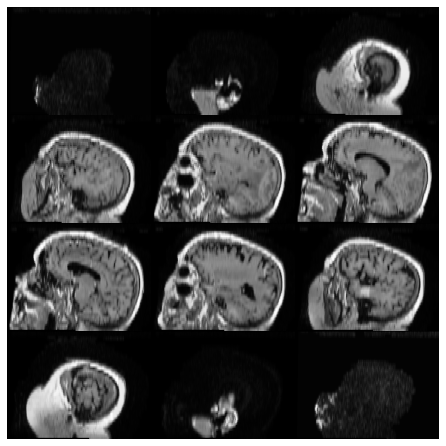

In [320]:
ants.plot(ants.image_read('/anvar/public_datasets/preproc_study/gbm/3_susan/T1.nii.gz'))

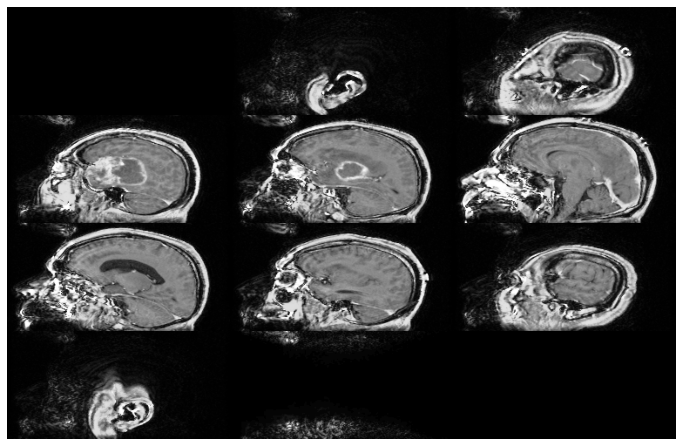

In [322]:
ants.plot(ants.image_read('/anvar/public_datasets/preproc_study/gbm/3_susan/CT1.nii.gz'))

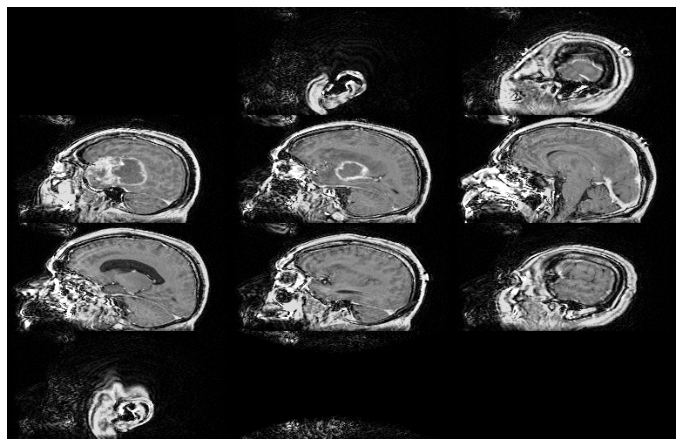

In [327]:
ants.plot(ants.image_read('/anvar/public_datasets/preproc_study/gbm/2_n4/TCGA-08-0520/CT1.nii.gz'))